## Surface temperature - tas

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy

import os
home = os.path.expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
from myFuncs import *

### one dataset

In [3]:
variable = 'tas'

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments =[
    'historical',
    # 'rcp85'
    ]

print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], home, resolution=resolutions[0])
ds

variable:tas, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 10950, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
    height   float64 ...
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    tas      (time, lat, lon) float32 ...
Attributes: (12/27)
    title:                  NOAA GFDL GFDL-CM3, historical (run 1) experiment...
    institute_id:           NOAA GFDL
    source:                 GFDL-CM3 2010 atmosphere: AM3 (AM3p9,C48L48); sea...
    contact:                gfdl.climate.model.info@noaa.gov
    project_id:             CMIP5
    table_id:               Table day (31 Jan 2011)
    ...                     ...
    parent_experiment_id:   piControl
    physics_version:        1
    product:                output1
    institution:            NOAA GFDL(201 Forrestal Rd, Princeton, NJ, 08540)
    history:                File was processed by fremetar (GFDL analog of CM...
    parent_experiment_rip:  r1i1p1

In [4]:
data = ds[variable]
data

<xarray.DataArray 'tas' (time: 10950, lat: 22, lon: 128)>
[30835200 values with dtype=float32]
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
    height   float64 2.0
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative
    units:          °C

In [5]:
has_nan = np.isnan(data).any()
print('characteristics')
print('hasNaN:', has_nan.data)
print('max', data.max().data)
print('min', data.min().data)
print('mean', data.mean().data)

characteristics
hasNaN: False
max 43.661781311035156
min -30.611772537231445
mean 23.394112


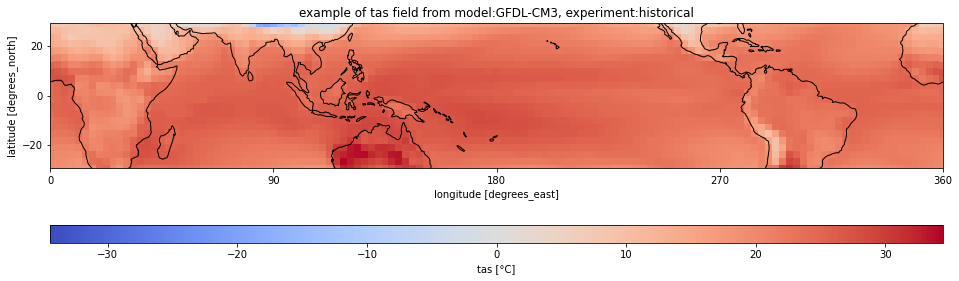

In [6]:
scene = data.isel(time=0)
title = 'example of {} field from model:{}, experiment:{}'.format(variable, datasets[0], experiments[0])
cmap = 'coolwarm'
plot_scene(scene, cmap=cmap, title=title)

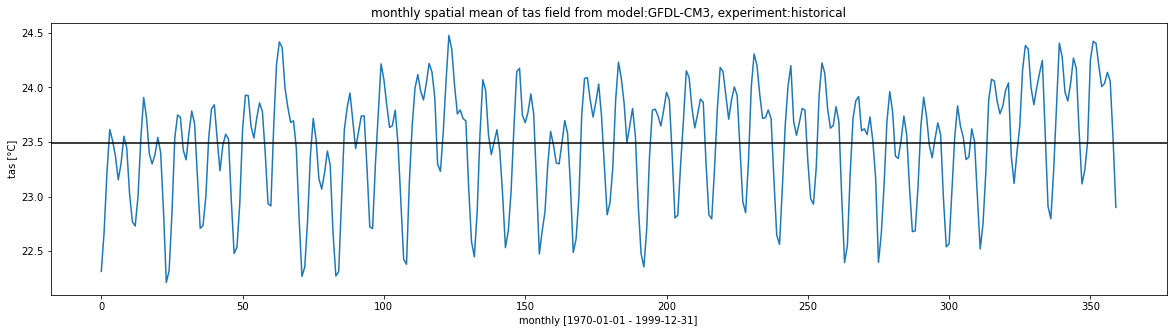

In [7]:
timeMean_option = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon'))
title = '{} spatial mean of {} field from model:{}, experiment:{}'.format(timeMean_option[0], variable, datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_option[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
if datasets[0] == 'FGOALS-g2': # this model only had monthly variable for surface temperature
    xlabel = 'monthly [Nb, {} - {}]'.format(str(data.isel(time=0).coords['time'].values)[:7], str(data.isel(time=-1).coords['time'].values)[:7])
ylabel = '{} [{}]'.format(variable, data.units)

plot_timeseries(y, title=title, timeMean_option=timeMean_option)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_option[0]=='seasonal':
    plt.legend()

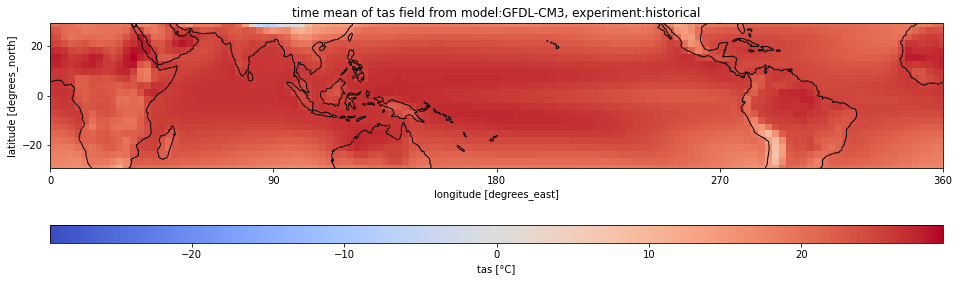

In [8]:
scene = data.mean(dim='time', keep_attrs=True)
title = 'time mean of {} field from model:{}, experiment:{}'.format(variable, datasets[0], experiments[0])
cmap = 'coolwarm'
plot_scene(scene, cmap=cmap, title=title)

In [9]:
aWeights = np.cos(np.deg2rad(data.lat))
data.mean(dim='time', keep_attrs=True).weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True)

<xarray.DataArray 'tas' ()>
array(23.49213453)
Coordinates:
    height   float64 2.0
Attributes:
    regrid_method:  conservative
    units:          °C

In [10]:
# run all above from this cell

### comparing datasets

In [11]:
variable = 'tas'

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

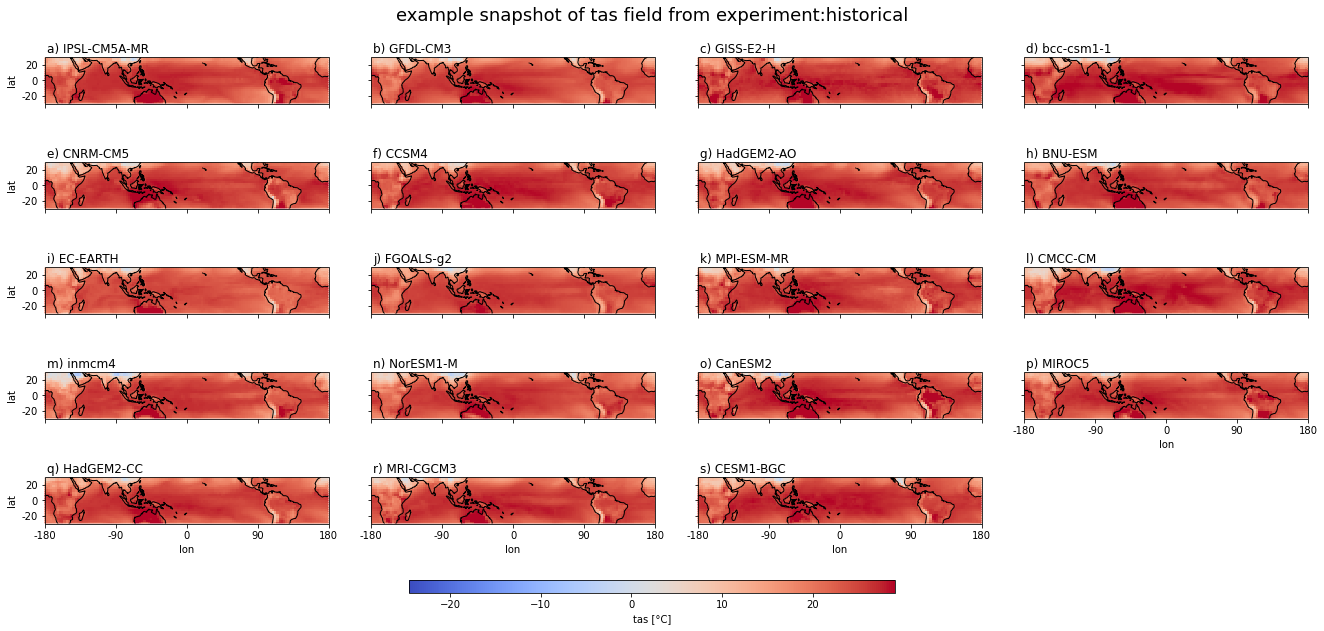

In [12]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0])[variable].isel(time=0)
        y= data
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'example snapshot of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0])[variable].isel(time=0)
    y = data

    cmap = 'coolwarm'
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax)
    
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)
    
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('tas', y.units))

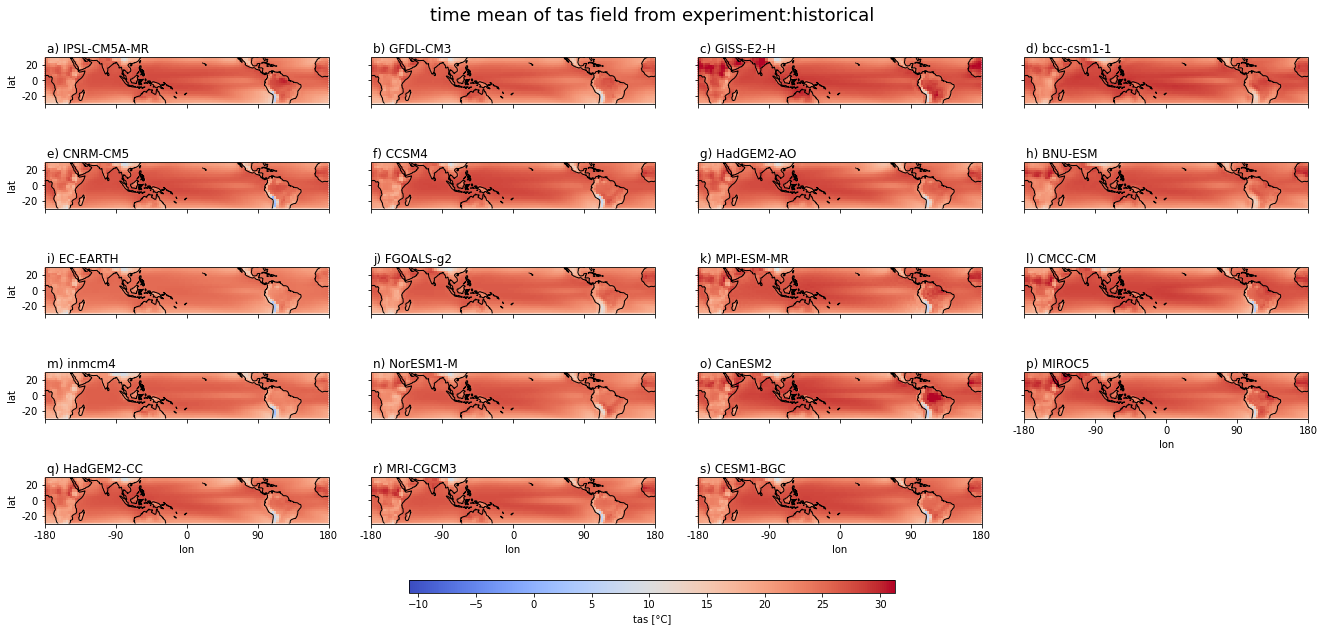

In [13]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.99
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0])[variable]
        y = data.mean(dim='time',keep_attrs=True)

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'time mean of {} field from experiment:{}'.format(variable, experiments[0])

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
            
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data = get_dsvariable(variable, dataset, experiments[0])[variable]
    y = data.mean(dim=('time'),keep_attrs=True)

    cmap = 'coolwarm'
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=vmin, vmax=vmax)
    
    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])

plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format(variable, y.units))


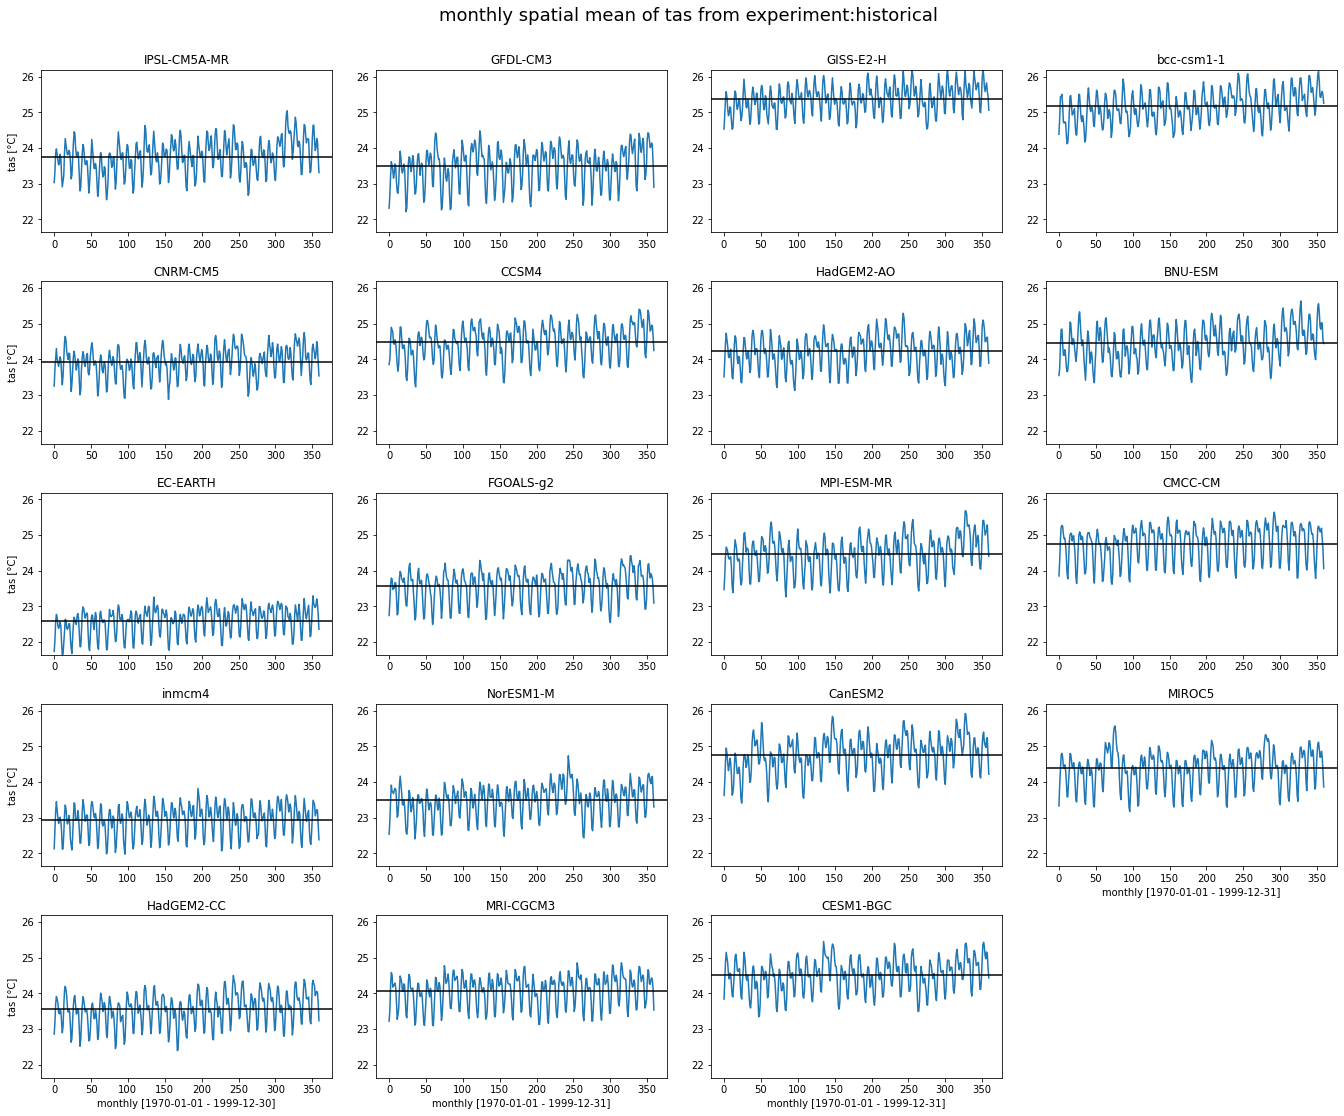

In [14]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

# find limits
absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('lat','lon'))

        if timeMean_options[0] == 'annual':
            y = y.resample(time='Y').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'seasonal':
            y = y.resample(time='QS-DEC').mean(dim="time")
            y = to_monthly(y)
            y = y.rename({'month':'season'})
            y = y.assign_coords(season = ["MAM", "JJA", "SON", "DJF"])
            y = y.isel(year=slice(1, None))

        if timeMean_options[0] == 'monthly':
            if datasets[0] == 'FGOALS-g2': # this model only had monthly variable for surface temperature
                y=y
            else:
                y = y.resample(time='M').mean(dim='time', keep_attrs=True)

        if timeMean_options[0] == 'daily':
            y = y

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


# plot
fig= plt.figure(figsize=(22.5,17.5))
title = '{} spatial mean of {} from experiment:{}'.format(timeMean_options[0], variable, experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)

    data = get_dsvariable(variable, dataset, experiments[0])[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    y= data.weighted(aWeights).mean(dim=('lat','lon'))

    title = dataset
    plot_timeseries(y, title=title, timeMean_option=timeMean_options, ax=ax, ymin=vmin, ymax=vmax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{} - {}]'.format(timeMean_options[0], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
        plt.xlabel(xlabel)

        if timeMean_options[0]=='seasonal':
            plt.legend()

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'tas [{}]'.format(data.units)
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

Text(0, 0.5, 'tas [°C]')

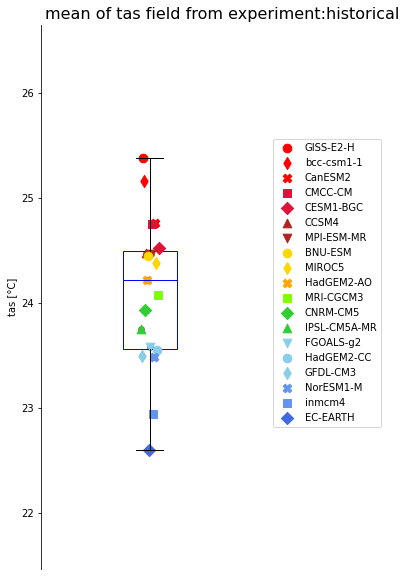

In [45]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

colors = [
    'red', 'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', 'gold', 'orange', # yellow
    'chartreuse', 'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax, y_list = [], [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        y = data.weighted(aWeights).mean(dim=('time','lat','lon'))

        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
        y_list = np.append(y_list, y)

    vmin = np.min(vmin)
    vmax = np.max(vmax)
    order = np.argsort(y_list)[::-1]

else:
    vmin, vmax = None, None 


plt.figure(figsize=(6.5,10))
title = 'mean of {} field from experiment:{}'.format(variable, experiments[0])
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:
    data = get_dsvariable(variable, dataset, experiments[0])[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    y_data = data.weighted(aWeights).mean(dim=('time','lat','lon'))

    y = np.append(y, y_data)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('tas [{}]'.format(data.units))



### Comparing datasets in a warmer climate

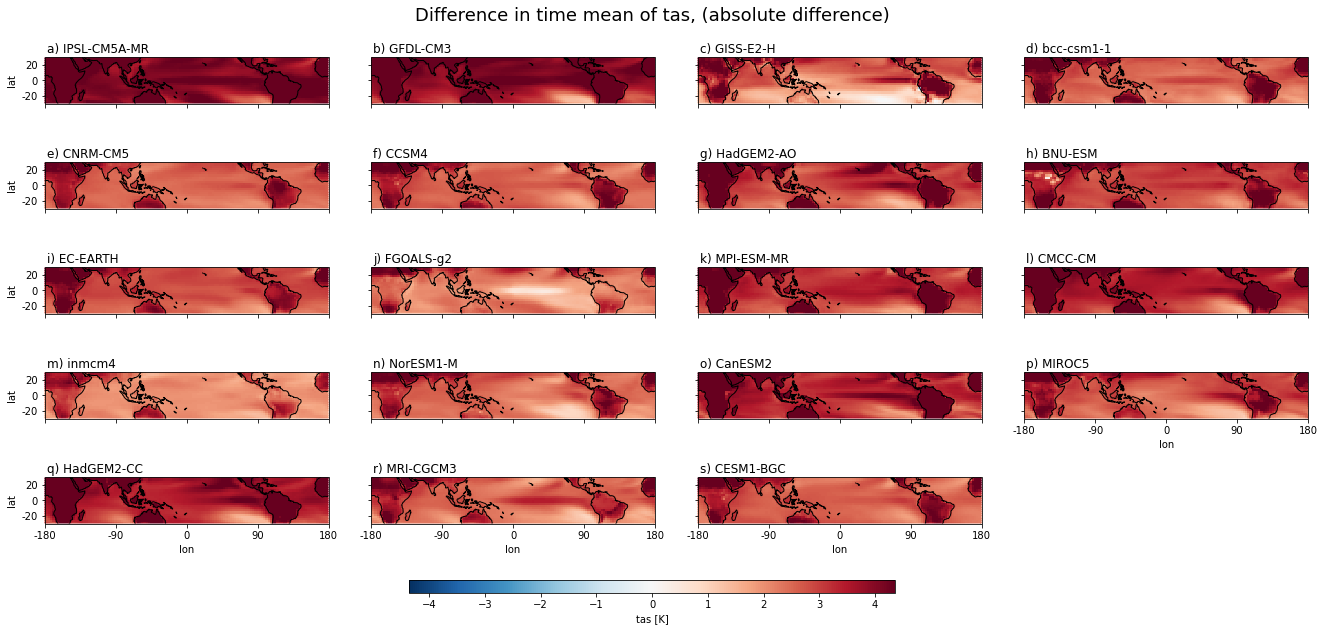

In [34]:
absolute_limits = True
quantile_low = 0
quantile_high = 0.95
if absolute_limits:
    vmin, vmax = [], []
    for dataset in datasets:
        
        data_historical = get_dsvariable(variable, dataset, experiment='historical')[variable].mean(dim='time')
        data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')[variable].mean(dim='time')
        aWeights = np.cos(np.deg2rad(data_historical.lat))
        
        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100

        model = dataset
        folder_save = '{}/Documents/data/CMIP5/metrics_cmip5/{}'.format(home,dataset)
        fileName = model + '_tas_tMean_rcp85.nc'
        ds_tas_tMean = xr.Dataset(
            data_vars ={'tas_tMean': data_rcp})
        save_file(ds_tas_tMean, folder_save, fileName)


        y= datadiff

    vmin = np.append(vmin, np.quantile(y, quantile_low))
    vmax = np.append(vmax, np.quantile(y, quantile_high))

    vmin = np.min(vmin)
    vmax = np.max(vmax)

else:
    vmin, vmax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'Difference in time mean of {}, ({})'.format(variable, 'absolute difference')

fig.suptitle(title, fontsize=18, x= 0.575, y=0.80)

for i, dataset in enumerate(datasets):
            
    ax= fig.add_subplot(5,4,i+1,projection=cartopy.crs.PlateCarree(central_longitude=180))

    data_historical = get_dsvariable(variable, dataset, experiment='historical')[variable].mean(dim='time')
    data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')[variable].mean(dim='time')
    aWeights = np.cos(np.deg2rad(data_historical.lat))
    
    datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    y= datadiff
    y.attrs['units'] = 'K'

    cmap = 'RdBu_r'
    pcm = plot_scene(y, cmap=cmap, ax=ax, vmin=-vmax, vmax=vmax)

    letters='abcdefghijklmnopqrst'
    plt.text(-177.5, 35, letters[i] + ') ' + dataset, fontsize=12)

    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_yticks([-20, 0, 20])
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    if (len(datasets)-i)<=4:
        xlabel = 'lon'
        plt.xlabel(xlabel)
        ax.set_xticklabels([-180, -90, 0, 90, 180])

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'lat'
        plt.ylabel(ylabel)
        ax.set_yticklabels([-20, 0, 20])


plt.subplots_adjust(left=0.2, bottom=0.2, right=0.98, top=0.95, wspace=0.15, hspace=-0.8)

cbar_ax = fig.add_axes([0.425, 0.335, 0.3, 0.01])
cbar = fig.colorbar(pcm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('{} [{}]'.format('tas', y.units))


Text(0, 0.5, 'tas [°C]')

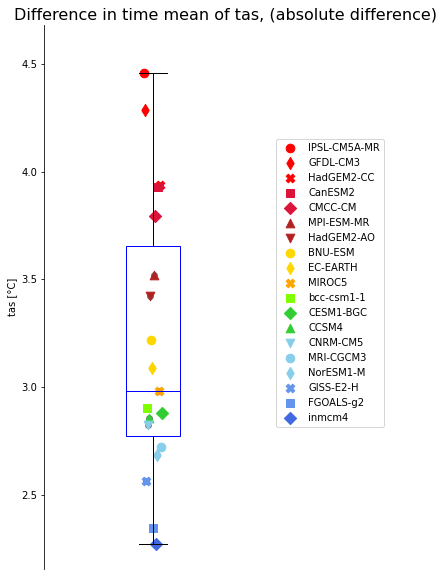

In [46]:
labels =[
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

colors = [
    'red', 'red', 'red', 'crimson', 'crimson', 'firebrick', 'firebrick', # red
    'gold', 'gold', 'orange', # yellow
    'chartreuse', 'limegreen', 'limegreen', # green
    'skyblue', 'skyblue', 'skyblue', 'cornflowerblue', 'cornflowerblue', 'royalblue', 'royalblue' # blue
    ]

markers = ['o','d','X','s','D', '^','v']


absolute_limits = True
quantile_low = 0
quantile_high = 1
if absolute_limits:
    vmin, vmax, y_list = [], [], []
    for dataset in datasets:
        
        data = get_dsvariable(variable, dataset, experiments[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        data_historical = get_dsvariable(variable, dataset, experiment='historical')[variable].weighted(aWeights).mean(dim=('time','lat','lon'))
        data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')[variable].weighted(aWeights).mean(dim=('time','lat','lon'))

        datadiff = data_rcp - data_historical
        # datadiff = (datadiff/data_historical)*100
        y= datadiff
        
        vmin = np.append(vmin, np.quantile(y, quantile_low))
        vmax = np.append(vmax, np.quantile(y, quantile_high))
        y_list = np.append(y_list, y)

    vmin = np.min(vmin)
    vmax = np.max(vmax)
    order = np.argsort(y_list)[::-1]

else:
    vmin, vmax = None, None 



plt.figure(figsize=(6.5,10))
title = 'Difference in time mean of {}, ({})'.format(variable, 'absolute difference')
plt.xlim(0,1)
plt.ylim(vmin*0.95, vmax*1.05)

y= []
for dataset in datasets:

    data = get_dsvariable(variable, dataset, experiments[0])[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    data_historical = get_dsvariable(variable, dataset, experiment='historical')[variable].weighted(aWeights).mean(dim=('time','lat','lon'))
    data_rcp = get_dsvariable(variable, dataset, experiment='rcp85')[variable].weighted(aWeights).mean(dim=('time','lat','lon'))

    datadiff = data_rcp - data_historical

    

    # datadiff = (datadiff/data_historical)*100
    y = np.append(y, datadiff)

plt.boxplot(y,vert=True, positions= [0.3], patch_artist=True, medianprops = dict(color="b",linewidth=1),boxprops = dict(color="b",facecolor='w',zorder=0)
            ,sym='+',flierprops = dict(color="r"))

x = np.linspace(0.3-0.025, 0.3+0.025, len(y))
plt.scatter(x, y, c='k', alpha=0.4)

if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()

    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.95,0.8))

plt.xticks([])
sns.despine(top=True, right=True, left=False, bottom=True)
plt.title(title, fontsize = 16)
plt.ylabel('tas [{}]'.format('\u00B0C'))